In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\DiTella\MEC\Materias\2025\2025 1T\[MT10] Series de Tiempo\Clases prácticas\Práctica 0-20250322\gendata.xlsx"
df = pd.read_excel(path)
df.head()

,y1,y2,y3,y4,y5
0,0.933895,1.203655,0.127276,-0.627108,1.514516
1,1.723346,1.425864,1.038572,-1.617540,1.480403
2,1.564982,1.426851,1.426594,1.151779,-0.344754
3,0.752551,3.088713,1.247394,0.994978,1.550536
4,-0.116989,2.558566,0.028583,-0.018541,2.364941


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y1      1000 non-null   float64
 1   y2      1000 non-null   float64
 2   y3      1000 non-null   float64
 3   y4      1000 non-null   float64
 4   y5      1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


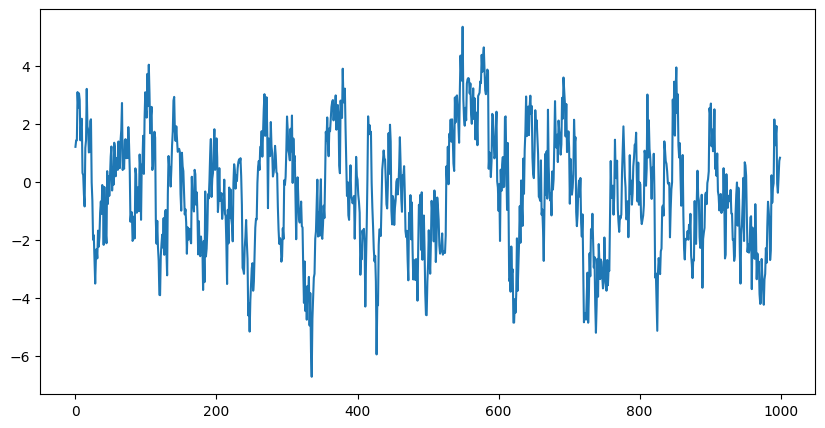

In [2]:
df['y2'].plot(figsize=(10,5));

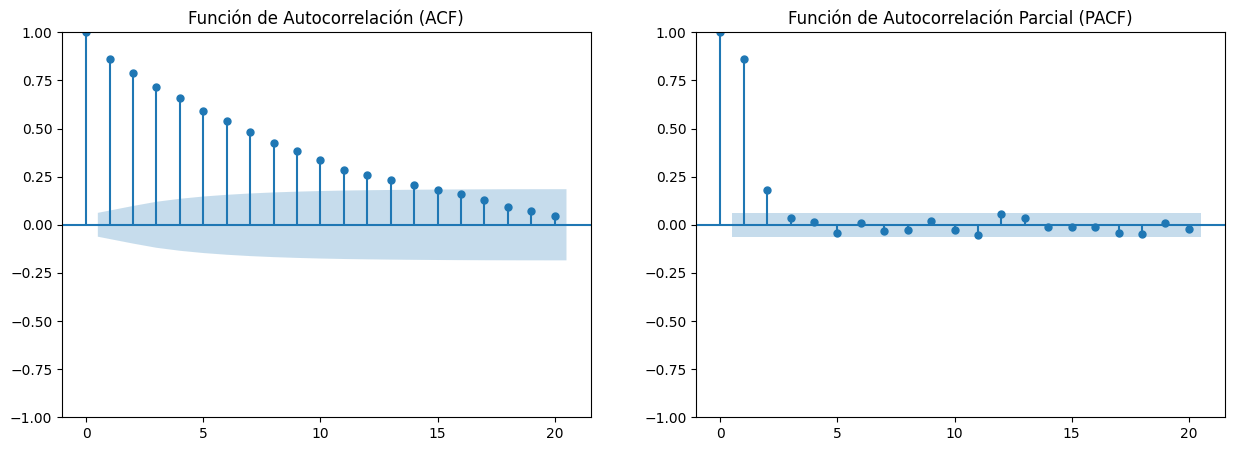

In [3]:
serie_2 = df["y2"]

# Graficar ACF y PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(serie_2, lags=20, ax=axes[0])  # Correlograma de autocorrelaciones (ACF)
plot_pacf(serie_2, lags=20, ax=axes[1])  # Correlograma de autocorrelaciones parciales (PACF)

axes[0].set_title("Función de Autocorrelación (ACF)")
axes[1].set_title("Función de Autocorrelación Parcial (PACF)")

plt.show()

In [5]:
# Calcular ACF y PACF
acf_values = acf(serie_2, nlags=20)
pacf_values = pacf(serie_2, nlags=20)

# Calcular la prueba de Ljung-Box (QStat y p-valor)
ljung_box = acorr_ljungbox(serie_2, lags=20, return_df=True)

# Crear DataFrame con los resultados
correlograma = pd.DataFrame({
    "Lag": np.arange(1, 21),  # Ajustamos los lags desde 1
    "ACF": np.round(acf_values[1:21], 3),  # Excluimos lag 0
    "PACF": np.round(pacf_values[1:21], 3),
    "QStat": np.round(ljung_box["lb_stat"].values, 2), #En cada rezago, la H0 es: la correlación con el lag anterior y todos los anteriores, ¿es cero? 
    "p-value": np.round(ljung_box["lb_pvalue"].values, 2)
})

# Mostrar resultados
print(correlograma)

    Lag    ACF   PACF    QStat  p-value
0     1  0.860  0.861   741.22      0.0
1     2  0.786  0.182  1361.77      0.0
2     3  0.718  0.035  1879.57      0.0
3     4  0.658  0.016  2314.73      0.0
4     5  0.591 -0.041  2666.54      0.0
5     6  0.539  0.012  2958.93      0.0
6     7  0.480 -0.034  3191.86      0.0
7     8  0.426 -0.027  3374.74      0.0
8     9  0.383  0.018  3523.01      0.0
9    10  0.336 -0.029  3637.02      0.0
10   11  0.283 -0.054  3718.11      0.0
11   12  0.256  0.056  3784.60      0.0
12   13  0.235  0.038  3840.54      0.0
13   14  0.208 -0.013  3884.46      0.0
14   15  0.182 -0.014  3918.28      0.0
15   16  0.159 -0.012  3944.18      0.0
16   17  0.128 -0.045  3960.92      0.0
17   18  0.094 -0.051  3970.00      0.0
18   19  0.073  0.010  3975.51      0.0
19   20  0.047 -0.021  3977.75      0.0


In [7]:
# Ajustar un modelo AR(1) usando Máxima Verosimilitud
modelo_mle = sm.tsa.ARIMA(df["y2"], order=(2,0,0)).fit()

print(modelo_mle.summary())

                               SARIMAX Results                                
Dep. Variable:                     y2   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1423.846
Date:                Wed, 02 Apr 2025   AIC                           2855.692
Time:                        22:26:16   BIC                           2875.323
Sample:                             0   HQIC                          2863.153
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3517      0.276     -1.273      0.203      -0.893       0.190
ar.L1          0.7033      0.031     22.509      0.000       0.642       0.764
ar.L2          0.1818      0.031      5.861      0.0

In [9]:
n = len(df)  # Número de observaciones en tu modelo
aic_eviews = modelo_mle.aic / n
bic_eviews = modelo_mle.bic / n
print(f"AIC en EViews: {aic_eviews}")
print(f"BIC en EViews: {bic_eviews}")

AIC en EViews: 2.8556920295288526
BIC en EViews: 2.875323050644781


In [10]:
# Obtener residuos del modelo ajustado
residuos = modelo_mle.resid

# Calcular ACF y PACF de los residuos
acf_values = sm.tsa.acf(residuos, nlags=36)
pacf_values = sm.tsa.pacf(residuos, nlags=36)

# Prueba de Ljung-Box (Q-Statistics)
ljung_box = acorr_ljungbox(residuos, lags=36, return_df=True)

# Crear DataFrame con los resultados
correlograma_residuos = pd.DataFrame({
    "Lag": np.arange(1, 37),
    "ACF": np.round(acf_values[1:37], 3),
    "PACF": np.round(pacf_values[1:37], 3),
    "Q-Stat": np.round(ljung_box["lb_stat"].values, 3),
    "p-value": np.round(ljung_box["lb_pvalue"].values, 3)
})

# Mostrar tabla
print(correlograma_residuos)

    Lag    ACF   PACF  Q-Stat  p-value
0     1 -0.006 -0.006   0.032    0.858
1     2 -0.032 -0.032   1.032    0.597
2     3  0.008  0.008   1.102    0.776
3     4  0.042  0.041   2.868    0.580
4     5 -0.015 -0.014   3.090    0.686
5     6  0.037  0.040   4.490    0.611
6     7  0.009  0.008   4.570    0.712
7     8 -0.023 -0.022   5.102    0.747
8     9  0.035  0.037   6.363    0.703
9    10  0.023  0.019   6.918    0.733
10   11 -0.081 -0.079  13.569    0.258
11   12 -0.022 -0.022  14.063    0.297
12   13  0.030  0.021  14.970    0.309
13   14  0.008  0.009  15.040    0.375
14   15  0.003  0.010  15.047    0.448
15   16  0.039  0.037  16.594    0.412
16   17  0.012  0.018  16.753    0.471
17   18 -0.036 -0.032  18.089    0.450
18   19  0.015  0.009  18.326    0.501
19   20 -0.000 -0.002  18.326    0.566
20   21  0.009  0.015  18.403    0.623
21   22 -0.017 -0.025  18.711    0.663
22   23 -0.057 -0.067  21.996    0.521
23   24 -0.057 -0.054  25.280    0.391
24   25 -0.016 -0.021  25

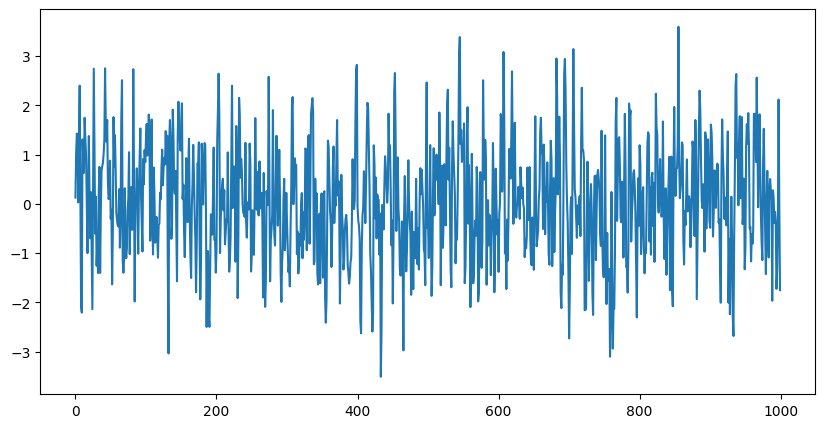

In [11]:
df['y3'].plot(figsize=(10,5));

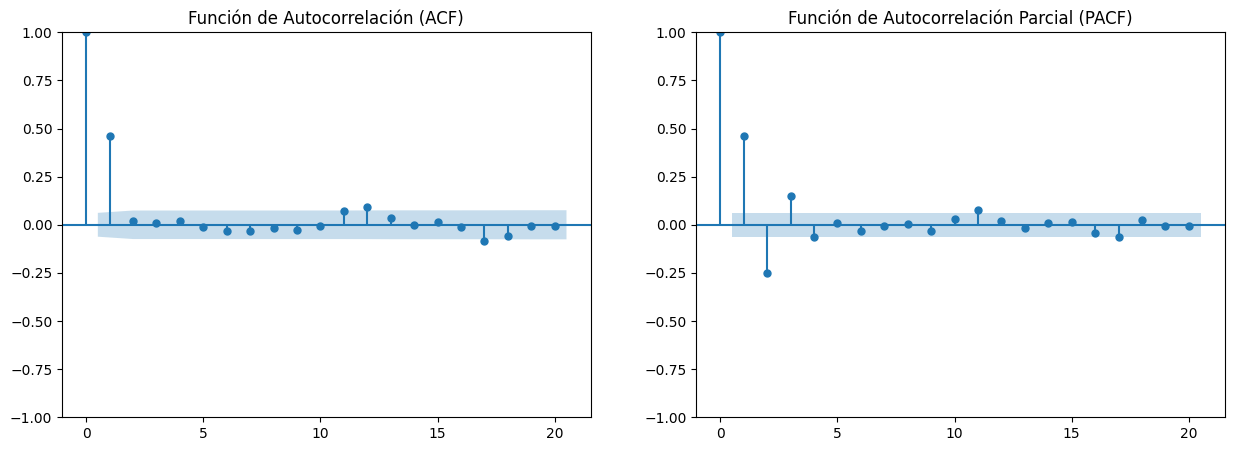

In [15]:
serie_3 = df["y3"]

# Graficar ACF y PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(serie_3, lags=20, ax=axes[0])  # Correlograma de autocorrelaciones (ACF)
plot_pacf(serie_3, lags=20, ax=axes[1])  # Correlograma de autocorrelaciones parciales (PACF)

axes[0].set_title("Función de Autocorrelación (ACF)")
axes[1].set_title("Función de Autocorrelación Parcial (PACF)")

plt.show()

In [13]:
# Ajustar un modelo MA(1) usando Máxima Verosimilitud
modelo_mle = sm.tsa.ARIMA(df["y3"], order=(0,0,1)).fit()

print(modelo_mle.summary())

                               SARIMAX Results                                
Dep. Variable:                     y3   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1387.286
Date:                Wed, 02 Apr 2025   AIC                           2780.572
Time:                        22:37:10   BIC                           2795.295
Sample:                             0   HQIC                          2786.168
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0477      0.049      0.974      0.330      -0.048       0.144
ma.L1          0.5974      0.025     23.628      0.000       0.548       0.647
sigma2         0.9382      0.042     22.447      0.0

In [14]:
# Obtener residuos del modelo ajustado
residuos = modelo_mle.resid

# Calcular ACF y PACF de los residuos
acf_values = sm.tsa.acf(residuos, nlags=36)
pacf_values = sm.tsa.pacf(residuos, nlags=36)

# Prueba de Ljung-Box (Q-Statistics)
ljung_box = acorr_ljungbox(residuos, lags=36, return_df=True)

# Crear DataFrame con los resultados
correlograma_residuos = pd.DataFrame({
    "Lag": np.arange(1, 37),
    "ACF": np.round(acf_values[1:37], 3),
    "PACF": np.round(pacf_values[1:37], 3),
    "Q-Stat": np.round(ljung_box["lb_stat"].values, 3),
    "p-value": np.round(ljung_box["lb_pvalue"].values, 3)
})

# Mostrar tabla
print(correlograma_residuos)

    Lag    ACF   PACF  Q-Stat  p-value
0     1  0.029  0.029   0.858    0.354
1     2  0.014  0.014   1.068    0.586
2     3 -0.018 -0.019   1.403    0.705
3     4  0.041  0.043   3.131    0.536
4     5 -0.024 -0.026   3.725    0.590
5     6 -0.008 -0.008   3.782    0.706
6     7 -0.035 -0.033   5.051    0.654
7     8  0.008  0.007   5.109    0.746
8     9 -0.019 -0.017   5.479    0.791
9    10 -0.021 -0.022   5.920    0.822
10   11  0.048  0.053   8.260    0.690
11   12  0.075  0.071  13.968    0.303
12   13  0.004 -0.001  13.984    0.375
13   14 -0.008 -0.008  14.042    0.447
14   15  0.009  0.008  14.131    0.516
15   16  0.019  0.014  14.512    0.561
16   17 -0.084 -0.086  21.742    0.195
17   18 -0.021 -0.012  22.188    0.224
18   19 -0.008 -0.002  22.259    0.272
19   20  0.024  0.022  22.849    0.296
20   21 -0.060 -0.052  26.533    0.187
21   22  0.024  0.027  27.099    0.207
22   23  0.017  0.012  27.400    0.239
23   24  0.001 -0.017  27.401    0.286
24   25  0.052  0.062  30

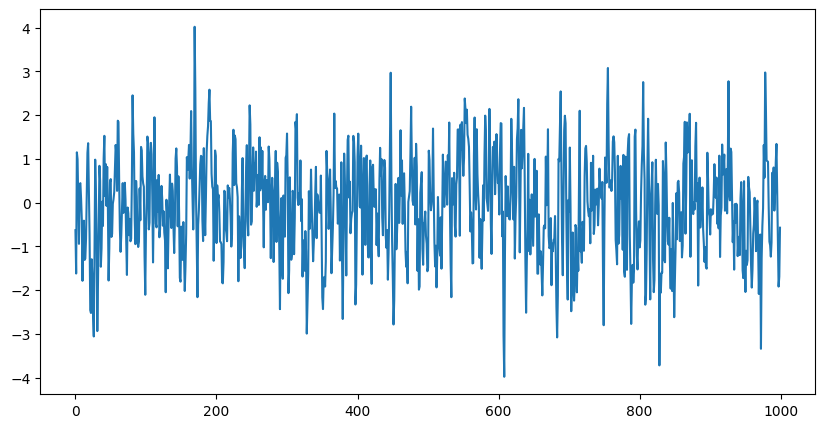

In [17]:
df['y4'].plot(figsize=(10,5));

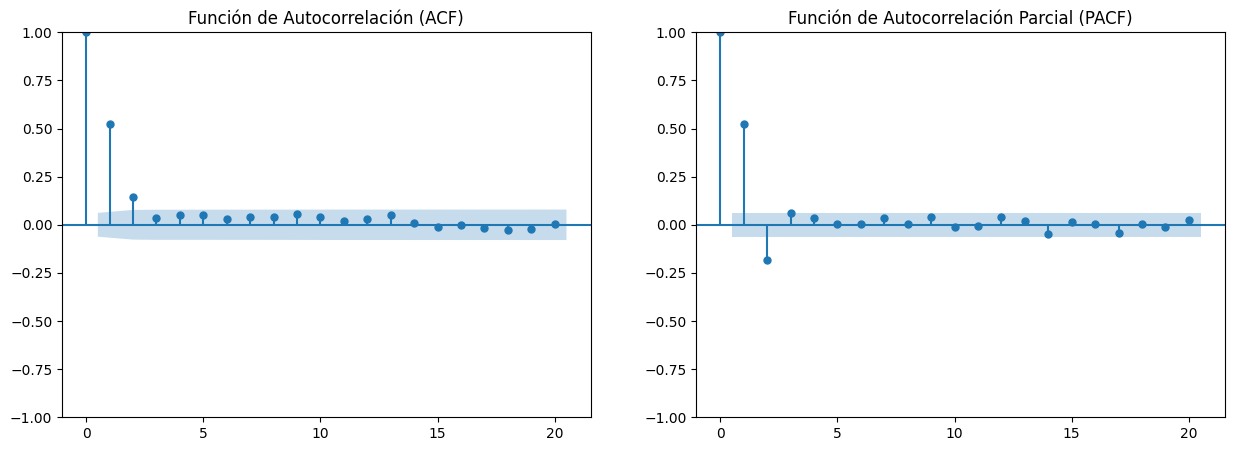

In [16]:
serie_4 = df["y4"]

# Graficar ACF y PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(serie_4, lags=20, ax=axes[0])  # Correlograma de autocorrelaciones (ACF)
plot_pacf(serie_4, lags=20, ax=axes[1])  # Correlograma de autocorrelaciones parciales (PACF)

axes[0].set_title("Función de Autocorrelación (ACF)")
axes[1].set_title("Función de Autocorrelación Parcial (PACF)")

plt.show()

In [18]:
# Ajustar un modelo MA(2) usando Máxima Verosimilitud
modelo_mle = sm.tsa.ARIMA(df["y4"], order=(0,0,2)).fit()

print(modelo_mle.summary())

                               SARIMAX Results                                
Dep. Variable:                     y4   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1363.306
Date:                Wed, 02 Apr 2025   AIC                           2734.612
Time:                        22:43:30   BIC                           2754.243
Sample:                             0   HQIC                          2742.073
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0927      0.054     -1.713      0.087      -0.199       0.013
ma.L1          0.6295      0.032     19.618      0.000       0.567       0.692
ma.L2          0.1783      0.033      5.419      0.0

In [19]:
# Obtener residuos del modelo ajustado
residuos = modelo_mle.resid

# Calcular ACF y PACF de los residuos
acf_values = sm.tsa.acf(residuos, nlags=36)
pacf_values = sm.tsa.pacf(residuos, nlags=36)

# Prueba de Ljung-Box (Q-Statistics)
ljung_box = acorr_ljungbox(residuos, lags=36, return_df=True)

# Crear DataFrame con los resultados
correlograma_residuos = pd.DataFrame({
    "Lag": np.arange(1, 37),
    "ACF": np.round(acf_values[1:37], 3),
    "PACF": np.round(pacf_values[1:37], 3),
    "Q-Stat": np.round(ljung_box["lb_stat"].values, 3),
    "p-value": np.round(ljung_box["lb_pvalue"].values, 3)
})

# Mostrar tabla
print(correlograma_residuos)

    Lag    ACF   PACF  Q-Stat  p-value
0     1  0.002  0.002   0.004    0.948
1     2  0.005  0.005   0.034    0.983
2     3  0.017  0.017   0.329    0.955
3     4  0.024  0.024   0.913    0.923
4     5  0.036  0.036   2.219    0.818
5     6 -0.007 -0.008   2.267    0.894
6     7  0.032  0.031   3.308    0.855
7     8  0.002 -0.000   3.311    0.913
8     9  0.040  0.038   4.897    0.843
9    10  0.028  0.026   5.699    0.840
10   11 -0.012 -0.014   5.848    0.883
11   12  0.004  0.001   5.868    0.923
12   13  0.060  0.059   9.522    0.732
13   14 -0.015 -0.020   9.742    0.781
14   15 -0.022 -0.024  10.236    0.805
15   16  0.027  0.025  10.962    0.812
16   17 -0.023 -0.028  11.503    0.829
17   18 -0.007 -0.011  11.555    0.869
18   19 -0.020 -0.020  11.947    0.888
19   20  0.009  0.006  12.023    0.915
20   21 -0.001  0.000  12.023    0.939
21   22  0.075  0.077  17.803    0.718
22   23  0.006  0.003  17.844    0.766
23   24 -0.078 -0.075  24.132    0.454
24   25  0.050  0.049  26

In [2]:
path_2 = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\DiTella\MEC\Materias\2025\2025 1T\[MT10] Series de Tiempo\Clases prácticas\Práctica 0-20250322\return.xlsx"

df_2 = pd.read_excel(path_2)
df_2.head()

,returns,returns2,returnsf
0,-99.000000,NaN,-99.000000
1,0.011293,NaN,0.011293
2,0.006011,NaN,0.006011
3,-0.010711,NaN,-0.010711
4,0.006671,NaN,0.006671


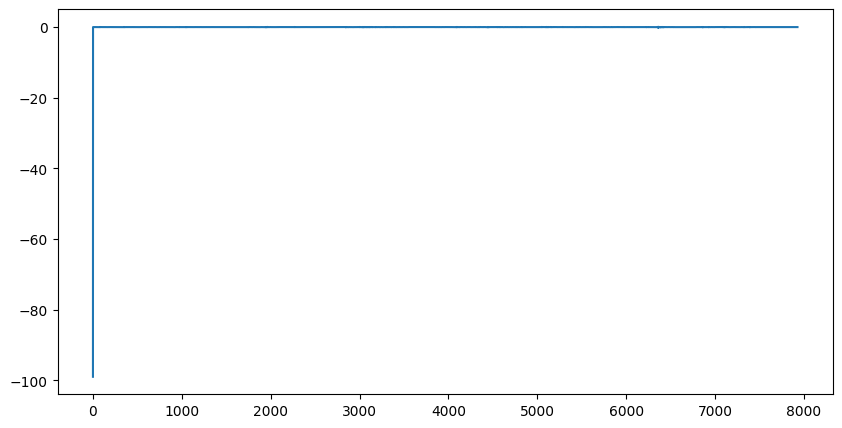

In [22]:
df_2['returns'].plot(figsize=(10,5));

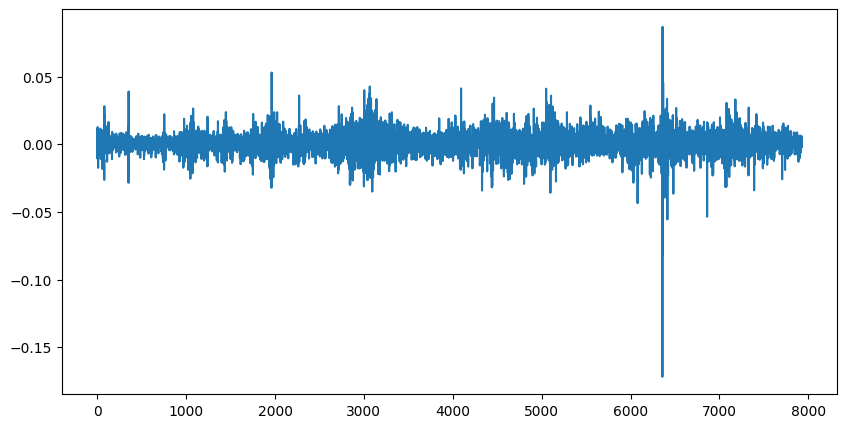

In [25]:
df_2.loc[1:,'returns'].plot(figsize=(10,5));

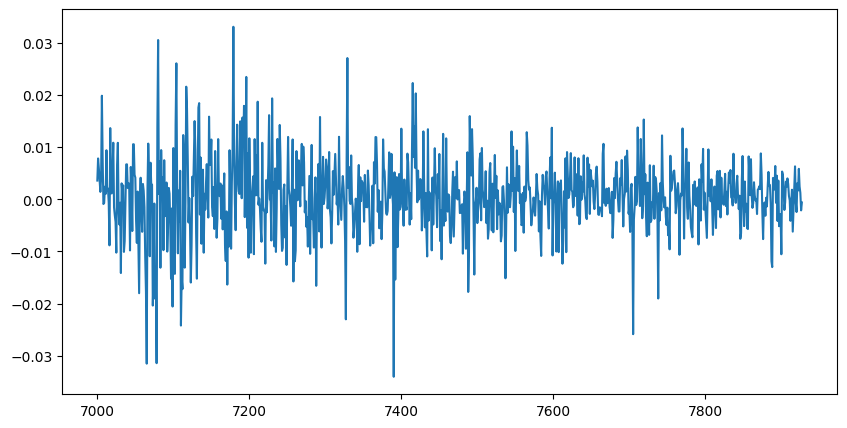

In [26]:
df_2.loc[7000:,'returns'].plot(figsize=(10,5));

In [23]:
df_2.describe()

,returns,returns2,returnsf
count,7928.000000,9.280000e+02,7928.000000
mean,-0.012035,5.112551e-05,-0.012036
std,1.111903,1.107835e-04,1.111903
min,-99.000000,9.061359e-11,-99.000000
25%,-0.003477,2.355397e-06,-0.003463
50%,0.000626,1.348241e-05,0.000605
75%,0.004528,5.482163e-05,0.004520
max,0.086793,1.158485e-03,0.086793


In [3]:
df_2_2 = df_2.dropna().reset_index(drop=True)
df_2_2.shape

(928, 3)

In [29]:
# Calcular ACF y PACF
acf_values = acf(df_2_2['returns'], nlags=20)
pacf_values = pacf(df_2_2['returns'], nlags=20)

# Calcular la prueba de Ljung-Box (QStat y p-valor)
ljung_box = acorr_ljungbox(df_2_2['returns'], lags=20, return_df=True)

# Crear DataFrame con los resultados
correlograma = pd.DataFrame({
    "Lag": np.arange(1, 21),  # Ajustamos los lags desde 1
    "ACF": np.round(acf_values[1:21], 3),  # Excluimos lag 0
    "PACF": np.round(pacf_values[1:21], 3),
    "QStat": np.round(ljung_box["lb_stat"].values, 2), #En cada rezago, la H0 es: la correlación con el lag anterior y todos los anteriores, ¿es cero? 
    "p-value": np.round(ljung_box["lb_pvalue"].values, 2)
})

# Mostrar resultados
print(correlograma)

    Lag    ACF   PACF  QStat  p-value
0     1  0.147  0.147  19.99      0.0
1     2 -0.014 -0.037  20.18      0.0
2     3 -0.044 -0.037  21.98      0.0
3     4  0.031  0.044  22.90      0.0
4     5  0.031  0.018  23.78      0.0
5     6 -0.083 -0.094  30.29      0.0
6     7 -0.083 -0.054  36.73      0.0
7     8 -0.040 -0.022  38.22      0.0
8     9  0.051  0.050  40.69      0.0
9    10  0.004 -0.014  40.71      0.0
10   11  0.056  0.069  43.64      0.0
11   12  0.047  0.034  45.69      0.0
12   13  0.065  0.045  49.70      0.0
13   14  0.041  0.020  51.25      0.0
14   15  0.009  0.007  51.32      0.0
15   16 -0.010 -0.009  51.40      0.0
16   17 -0.045 -0.036  53.30      0.0
17   18 -0.014  0.003  53.48      0.0
18   19  0.023  0.041  54.00      0.0
19   20  0.017  0.013  54.26      0.0


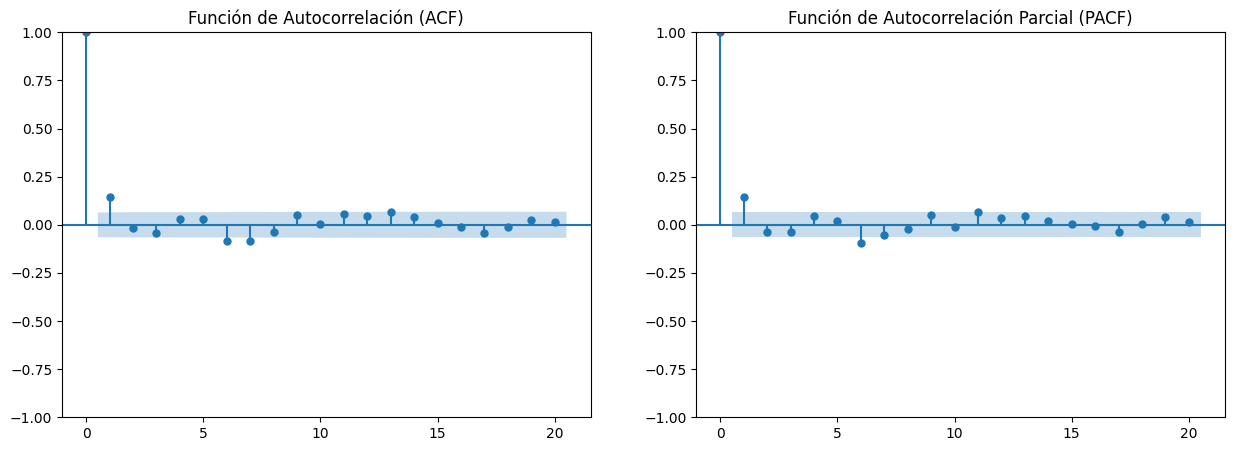

In [30]:
# Graficar ACF y PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(df_2_2['returns'], lags=20, ax=axes[0])  # Correlograma de autocorrelaciones (ACF)
plot_pacf(df_2_2['returns'], lags=20, ax=axes[1])  # Correlograma de autocorrelaciones parciales (PACF)

axes[0].set_title("Función de Autocorrelación (ACF)")
axes[1].set_title("Función de Autocorrelación Parcial (PACF)")

plt.show()

In [33]:
 # Ajustar un modelo AR(1) usando Máxima Verosimilitud
modelo_mle = sm.tsa.ARIMA(df_2_2["returns"], order=(1,0,0)).fit()

print(modelo_mle.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  928
Model:                 ARIMA(1, 0, 0)   Log Likelihood                3280.804
Date:                Wed, 02 Apr 2025   AIC                          -6555.607
Time:                        23:11:00   BIC                          -6541.108
Sample:                             0   HQIC                         -6550.076
                                - 928                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.966      0.049    1.56e-06       0.001
ar.L1          0.1465      0.028      5.251      0.000       0.092       0.201
sigma2      4.975e-05   1.63e-06     30.575      0.0

In [34]:
n = len(df_2_2)  # Número de observaciones en tu modelo
aic_eviews = modelo_mle.aic / n
bic_eviews = modelo_mle.bic / n
print(f"AIC en EViews: {aic_eviews}")
print(f"BIC en EViews: {bic_eviews}")

AIC en EViews: -7.0642317132291375
BIC en EViews: -7.048607688230907


In [35]:
# Obtener residuos del modelo ajustado
residuos = modelo_mle.resid

# Calcular ACF y PACF de los residuos
acf_values = sm.tsa.acf(residuos, nlags=36)
pacf_values = sm.tsa.pacf(residuos, nlags=36)

# Prueba de Ljung-Box (Q-Statistics)
ljung_box = acorr_ljungbox(residuos, lags=36, return_df=True)

# Crear DataFrame con los resultados
correlograma_residuos = pd.DataFrame({
    "Lag": np.arange(1, 37),
    "ACF": np.round(acf_values[1:37], 3),
    "PACF": np.round(pacf_values[1:37], 3),
    "Q-Stat": np.round(ljung_box["lb_stat"].values, 3),
    "p-value": np.round(ljung_box["lb_pvalue"].values, 3)
})

# Mostrar tabla
print(correlograma_residuos) 

    Lag    ACF   PACF  Q-Stat  p-value
0     1  0.005  0.005   0.027    0.870
1     2 -0.030 -0.030   0.885    0.642
2     3 -0.048 -0.048   3.064    0.382
3     4  0.035  0.035   4.195    0.380
4     5  0.040  0.037   5.676    0.339
5     6 -0.079 -0.081  11.558    0.073
6     7 -0.068 -0.063  15.899    0.026
7     8 -0.037 -0.039  17.173    0.028
8     9  0.059  0.047  20.442    0.015
9    10 -0.012 -0.017  20.584    0.024
10   11  0.051  0.062  23.005    0.018
11   12  0.031  0.037  23.889    0.021
12   13  0.055  0.047  26.742    0.013
13   14  0.031  0.026  27.663    0.016
14   15  0.004  0.012  27.681    0.024
15   16 -0.005 -0.002  27.701    0.034
16   17 -0.043 -0.037  29.466    0.030
17   18 -0.011 -0.009  29.588    0.042
18   19  0.024  0.038  30.125    0.050
19   20  0.012  0.015  30.258    0.066
20   21  0.020  0.032  30.642    0.080
21   22 -0.051 -0.052  33.139    0.060
22   23  0.003 -0.007  33.148    0.079
23   24 -0.007 -0.026  33.198    0.100
24   25 -0.037 -0.054  34

In [13]:
#Se presta atención en lag 6.

 # Ajustar un modelo AR(1 to 6) usando Máxima Verosimilitud
modelo_mle = sm.tsa.ARIMA(df_2_2["returns"], order=(6,0,0)).fit(method='innovations_mle')

print(modelo_mle.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  928
Model:                 ARIMA(6, 0, 0)   Log Likelihood                3287.170
Date:                Thu, 03 Apr 2025   AIC                          -6558.340
Time:                        21:00:32   BIC                          -6519.676
Sample:                             0   HQIC                         -6543.592
                                - 928                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      2.098      0.036    3.53e-05       0.001
ar.L1          0.1529      0.029      5.311      0.000       0.096       0.209
ar.L2         -0.0249      0.026     -0.971      0.3

In [ ]:
#Se presta atención en lag 6.

 # Ajustar un modelo AR(1) AR(6) usando Máxima Verosimilitud
modelo_mle = sm.tsa.ARIMA(df_2_2["returns"], order=([1,6],0,0)).fit(method='innovations_mle')

print(modelo_mle.summary())

                                SARIMAX Results                                
Dep. Variable:                 returns   No. Observations:                  928
Model:             ARIMA([1, 6], 0, 0)   Log Likelihood                3284.473
Date:                 Thu, 03 Apr 2025   AIC                          -6560.945
Time:                         21:00:45   BIC                          -6541.613
Sample:                              0   HQIC                         -6553.571
                                 - 928                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      2.171      0.030    5.22e-05       0.001
ar.L1          0.1491      0.028      5.269      0.000       0.094       0.205
ar.L6         -0.0877      0.029     -3.018 

In [ ]:
#Se presta atención en lag 6.

 # Ajustar un modelo AR(1) AR(2) AR(6) usando Máxima Verosimilitud
modelo_mle = sm.tsa.ARIMA(df_2_2["returns"], order=([1,2,6],0,0)).fit(method='innovations_mle')

print(modelo_mle.summary())

                                 SARIMAX Results                                  
Dep. Variable:                    returns   No. Observations:                  928
Model:             ARIMA([1, 2, 6], 0, 0)   Log Likelihood                3285.018
Date:                    Thu, 03 Apr 2025   AIC                          -6560.037
Time:                            21:07:35   BIC                          -6535.871
Sample:                                 0   HQIC                         -6550.819
                                    - 928                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      2.160      0.031    4.95e-05       0.001
ar.L1          0.1540      0.028      5.408      0.000       0.098       0.210
ar.L2         -0.034

In [12]:
#Quedamos con AR(1) y AR(6)

 # Ajustar un modelo AR(1) AR(6) usando Máxima Verosimilitud
modelo = sm.tsa.ARIMA(df_2_2["returns"], order=(6,0,0))

# Ajustar el modelo con restricciones: solo AR(1) y AR(6)
start_params = np.zeros(7)  # 6 coeficientes AR + varianza
start_params[0] = 0.1  # Valor inicial para AR(1)
start_params[5] = 0.1  # Valor inicial para AR(6)

modelo_mle = modelo.fit(start_params=start_params, method='innovations_mle')

print(modelo_mle.summary())

TypeError: statsmodels.tsa.arima.estimators.innovations.innovations_mle() got multiple values for keyword argument 'start_params'

In [ ]:
# Definir el modelo SARIMAX con 6 lags
modelo = sm.tsa.ARIMA(df_2_2["returns"], order=(6, 0, 0), enforce_stationarity=False)

# Ajustar el modelo con restricciones: solo AR(1) y AR(6)
modelo_mle = modelo.fit(
  # Algoritmo de optimización
)

# Obtener los coeficientes estimados
params = modelo_mle.params

# Forzar a cero los coeficientes de AR(2) a AR(5)
params[1:5] = 0

# Reentrenar el modelo con los valores restringidos
modelo_mle_restringido = modelo.fit_constrained({'ar.L2': 0, 'ar.L3': 0, 'ar.L4': 0, 'ar.L5': 0})

# Imprimir resultados
print(modelo_mle_restringido.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  928
Model:                 ARIMA(6, 0, 0)   Log Likelihood                3261.196
Date:                Wed, 02 Apr 2025   AIC                          -6514.391
Time:                        23:32:13   BIC                          -6495.085
Sample:                             0   HQIC                         -6507.025
                                - 928                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0005      0.000      2.070      0.038    2.72e-05       0.001
ar.L1             0.1516      0.028      5.345      0.000       0.096       0.207
ar.L2 (fixed)          0        nan     

In [71]:
import statsmodels.api as sm

# Definir el modelo SARIMAX con 6 lags
modelo = sm.tsa.SARIMAX(df_2_2["returns"], order=(6, 0, 0), enforce_stationarity=False)

# Ajustar el modelo con restricciones: solo AR(1) y AR(6)
modelo_mle = modelo.fit_constrained({'ar.L2': 0, 'ar.L3': 0, 'ar.L4': 0, 'ar.L5': 0})

# Imprimir resultados
print(modelo_mle.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  928
Model:               SARIMAX(6, 0, 0)   Log Likelihood                3259.061
Date:                Wed, 02 Apr 2025   AIC                          -6512.122
Time:                        23:33:14   BIC                          -6497.642
Sample:                             0   HQIC                         -6506.597
                                - 928                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ar.L1             0.1558      0.028      5.545      0.000       0.101       0.211
ar.L2 (fixed)          0        nan        nan        nan         nan         nan
ar.L3 (fixed)          0        nan     

In [73]:
n = len(df_2_2)  # Número de observaciones en tu modelo
aic_eviews = modelo_mle.aic / n
bic_eviews = modelo_mle.bic / n
print(f"AIC en EViews: {aic_eviews}")
print(f"BIC en EViews: {bic_eviews}")

AIC en EViews: -7.017372724936084
BIC en EViews: -7.0017696692564835


In [4]:
# Crear el modelo con la especificación exacta de AR(1) y AR(6)
ar_order = np.zeros(6)
ar_order[0] = 1  # AR(1)
ar_order[5] = 1  # AR(6)

# Usar SARIMAX para especificar exactamente qué términos AR incluir
model = sm.tsa.SARIMAX(df_2_2["returns"], order=(6, 0, 0), trend='c', 
                      enforce_stationarity=False,
                      enforce_invertibility=False,
                      restricted=True,
                      ar_params=ar_order)
model_fit = model.fit()

print(model_fit.summary())

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['restricted', 'ar_params']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  928
Model:               SARIMAX(6, 0, 0)   Log Likelihood                3263.936
Date:                Thu, 03 Apr 2025   AIC                          -6511.872
Time:                        20:41:06   BIC                          -6473.260
Sample:                             0   HQIC                         -6497.139
                                - 928                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0005      0.000      2.024      0.043    1.54e-05       0.001
ar.L1          0.1516      0.029      5.236      0.000       0.095       0.208
ar.L2         -0.0257      0.026     -0.998      0.3

In [7]:
import numpy as np
import pandas as pd
from scipy import optimize
from scipy import stats

# Supongamos que tienes tus datos en df_2_2["returns"]
y = df_2_2["returns"].values
T = len(y)

# Definir la función de log-likelihood para AR(1) y AR(6)
def neg_log_likelihood(params):
    const, phi1, phi6 = params
    residuals = np.zeros(T-6)
    
    for t in range(6, T):
        y_hat = const + phi1 * y[t-1] + phi6 * y[t-6]
        residuals[t-6] = y[t] - y_hat
    
    # Log-likelihood para residuos normales
    sigma2 = np.mean(residuals**2)
    log_lik = -0.5 * len(residuals) * (np.log(2*np.pi) + np.log(sigma2)) - \
              0.5 * np.sum(residuals**2) / sigma2
    
    return -log_lik  # Negativo porque minimizamos

# Valores iniciales para los parámetros
initial_params = [np.mean(y), 0.1, 0.1]  # [constante, phi1, phi6]

# Optimizar la función de log-likelihood
result = optimize.minimize(neg_log_likelihood, initial_params)

# Extraer los coeficientes estimados
const, phi1, phi6 = result.x

print(f"Constante: {const:.6f}")
print(f"AR(1): {phi1:.6f}")
print(f"AR(6): {phi6:.6f}")

Constante: 0.000482
AR(1): 0.147747
AR(6): -0.088041


In [8]:
import numpy as np
import pandas as pd
from scipy import optimize
from scipy import stats

# Supongamos que tienes tus datos en df_2_2["returns"]
y = df_2_2["returns"].values
T = len(y)

# Función para calcular residuos (podemos usarla varias veces)
def calculate_residuals(params, y, T):
    const, phi1, phi6 = params
    residuals = np.zeros(T-6)
    
    for t in range(6, T):
        y_hat = const + phi1 * y[t-1] + phi6 * y[t-6]
        residuals[t-6] = y[t] - y_hat
    
    return residuals

# Definir la función de log-likelihood para AR(1) y AR(6)
def neg_log_likelihood(params, y=y, T=T):
    residuals = calculate_residuals(params, y, T)
    
    # Comprobamos que hay suficientes datos
    if len(residuals) <= 3:
        return 1e10  # Penalización alta si hay pocos datos
    
    # Log-likelihood
    sigma2 = np.sum(residuals**2) / len(residuals)
    log_lik = -0.5 * len(residuals) * (np.log(2*np.pi) + np.log(sigma2)) - \
              0.5 * np.sum(residuals**2) / sigma2
    
    return -log_lik  # Negativo porque minimizamos

# Valores iniciales - múltiples puntos de inicio para evitar mínimos locales
initial_guesses = [
    [np.mean(y), 0.1, 0.1],
    [np.mean(y), 0.5, 0.1],
    [np.mean(y), 0.1, 0.5],
    [np.mean(y), -0.1, -0.1],
    [0, 0.1, 0.1]
]

best_result = None
best_likelihood = float('inf')

# Probar diferentes inicializaciones
for initial_params in initial_guesses:
    # Usar un método más robusto (BFGS)
    result = optimize.minimize(neg_log_likelihood, initial_params, 
                              args=(y, T), 
                              method='BFGS',
                              options={'maxiter': 1000})
    
    if result.fun < best_likelihood:
        best_likelihood = result.fun
        best_result = result

# Extraer los coeficientes estimados del mejor resultado
const, phi1, phi6 = best_result.x

# Calculamos los residuos para el mejor modelo
residuals = calculate_residuals(best_result.x, y, T)
sigma2 = np.sum(residuals**2) / len(residuals)

# Aproximación alternativa para errores estándar sin usar numdifftools
# Estimamos los errores estándar usando el método de Fisher Information Matrix
n = len(residuals)
X = np.zeros((n, 3))
X[:, 0] = 1  # Columna para la constante
for i in range(n):
    t = i + 6  # Índice original
    X[i, 1] = y[t-1]  # AR(1)
    X[i, 2] = y[t-6]  # AR(6)

# Matriz de Fisher Information Matrix aproximada
FIM = np.dot(X.T, X) / sigma2
try:
    cov_matrix = np.linalg.inv(FIM)
    std_errors = np.sqrt(np.diag(cov_matrix))
except:
    # En caso de que la matriz no sea invertible
    std_errors = [np.nan, np.nan, np.nan]

# Calcular estadísticos t y p-valores
t_stats = best_result.x / std_errors
p_values = [2 * (1 - stats.t.cdf(np.abs(t), len(residuals) - 3)) for t in t_stats]

# Calcular R-cuadrado
tss = np.sum((y[6:] - np.mean(y[6:]))**2)
rss = np.sum(residuals**2)
r_squared = 1 - (rss / tss)
adj_r_squared = 1 - ((1 - r_squared) * (len(residuals) - 1) / (len(residuals) - 3))

# Calcular criterios de información
aic = 2 * 3 + len(residuals) * np.log(sigma2)  # 3 parámetros
bic = 3 * np.log(len(residuals)) + len(residuals) * np.log(sigma2)

# Mostrar resultados en formato similar a EViews
print("==========================================================")
print("                   Resultados del modelo AR(1,6)")
print("==========================================================")
print(f"Número de observaciones: {len(residuals)}")
print(f"Log-likelihood: {-best_result.fun:.4f}")
print(f"AIC: {aic:.4f}")
print(f"BIC: {bic:.4f}")
print(f"R-cuadrado: {r_squared:.4f}")
print(f"R-cuadrado ajustado: {adj_r_squared:.4f}")
print("----------------------------------------------------------")
print("Variable      Coeficiente    Error Est.    t-Stat    p-valor")
print("----------------------------------------------------------")
print(f"Constante    {const:.6f}    {std_errors[0]:.6f}    {t_stats[0]:.4f}    {p_values[0]:.4f}")
print(f"AR(1)        {phi1:.6f}    {std_errors[1]:.6f}    {t_stats[1]:.4f}    {p_values[1]:.4f}")
print(f"AR(6)        {phi6:.6f}    {std_errors[2]:.6f}    {t_stats[2]:.4f}    {p_values[2]:.4f}")
print("==========================================================")

# Para comparar con EViews, intenta predecir los valores
def predict(params, y):
    const, phi1, phi6 = params
    fitted = np.zeros_like(y)
    
    # Los primeros 6 valores no se pueden predecir completamente
    fitted[:6] = np.nan
    
    for t in range(6, len(y)):
        fitted[t] = const + phi1 * y[t-1] + phi6 * y[t-6]
    
    return fitted

# Calcular valores ajustados
fitted_values = predict(best_result.x, y)

# Crear DataFrame con resultados (útil para comparar con EViews)
results_df = pd.DataFrame({
    'Original': y,
    'Fitted': fitted_values,
    'Residuals': np.concatenate([np.full(6, np.nan), residuals])
})

print("\nPrimeras filas de valores ajustados y residuos:")
print(results_df.head(10))

                   Resultados del modelo AR(1,6)
Número de observaciones: 922
Log-likelihood: 3261.2167
AIC: -9132.9560
BIC: -9118.4764
R-cuadrado: 0.0288
R-cuadrado ajustado: 0.0267
----------------------------------------------------------
Variable      Coeficiente    Error Est.    t-Stat    p-valor
----------------------------------------------------------
Constante    0.000482    0.000233    2.0682    0.0389
AR(1)        0.147747    0.032467    4.5507    0.0000
AR(6)        -0.088041    0.032445    -2.7135    0.0068

Primeras filas de valores ajustados y residuos:
   Original    Fitted  Residuals
0  0.003590       NaN        NaN
1  0.007834       NaN        NaN
2  0.005954       NaN        NaN
3  0.003784       NaN        NaN
4  0.001423       NaN        NaN
5  0.004147       NaN        NaN
6  0.019862  0.000779   0.019084
7  0.007856  0.002727   0.005129
8 -0.000903  0.001119  -0.002022
9 -0.000718  0.000015  -0.000733


In [4]:
import numpy as np
import pandas as pd
import pmdarima as pm

# Supongamos que tienes tus datos en df_2_2["returns"]
y = df_2_2["returns"]

# Especificar coeficientes AR a estimar
order = (6, 0, 0)  # (p, d, q)
fixed_params = np.zeros(7)  # [constante, AR(1), AR(2), ..., AR(6)]
fixed_mask = np.array([True, True, False, False, False, False, True])  # Solo constante, AR(1) y AR(6)

# Crear y ajustar el modelo con restricciones
model = pm.ARIMA(order=order, 
                 fixed_params=fixed_params,
                 fixed_mask=fixed_mask,
                 suppress_warnings=True)
results = model.fit(y)

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  928
Model:               SARIMAX(6, 0, 0)   Log Likelihood                3287.168
Date:                Thu, 03 Apr 2025   AIC                          -6558.336
Time:                        20:52:53   BIC                          -6519.671
Sample:                             0   HQIC                         -6543.587
                                - 928                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0005      0.000      2.108      0.035    3.51e-05       0.001
ar.L1          0.1516      0.029      5.268      0.000       0.095       0.208
ar.L2         -0.0257      0.026     -1.004      0.3

In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Supongamos que tienes tus datos en df_2_2["returns"]
y = df_2_2["returns"]

# Crear un DataFrame con los rezagos específicos que queremos
data = pd.DataFrame({'y': y})
data['lag1'] = data['y'].shift(1)  # AR(1)
data['lag6'] = data['y'].shift(6)  # AR(6)

# Eliminar las primeras 6 filas que tienen NaN debido a los rezagos
data = data.dropna()

# Separar variables dependientes e independientes
y_reg = data['y']
X_reg = data[['lag1', 'lag6']]
X_reg = sm.add_constant(X_reg)  # Añadir constante

# Ajustar un modelo de regresión lineal
model = sm.OLS(y_reg, X_reg)
results = model.fit()

print(results.summary())

# Extraer coeficientes que corresponden a AR(1) y AR(6)
print("\nCoeficientes del modelo AR(1,6):")
print(f"Constante: {results.params[0]:.6f}")
print(f"AR(1): {results.params[1]:.6f}")
print(f"AR(6): {results.params[2]:.6f}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     13.62
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           1.48e-06
Time:                        20:57:58   Log-Likelihood:                 3261.2
No. Observations:                 922   AIC:                            -6516.
Df Residuals:                     919   BIC:                            -6502.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      2.065      0.0

C:\Users\HP\AppData\Local\Temp\ipykernel_22168\1905520199.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Constante: {results.params[0]:.6f}")
C:\Users\HP\AppData\Local\Temp\ipykernel_22168\1905520199.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"AR(1): {results.params[1]:.6f}")
C:\Users\HP\AppData\Local\Temp\ipykernel_22168\1905520199.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"AR(6): {r

In [11]:
import numpy as np
import pandas as pd
from scipy import optimize
from scipy import stats

# Supongamos que tienes tus datos en df_2_2["returns"]
y = df_2_2["returns"].values
T = len(y)

# Función para calcular log-likelihood del modelo AR(1,6)
def log_likelihood(params, y, T):
    const, phi1, phi6, sigma2 = params
    
    # Inicializamos el log-likelihood
    log_lik = 0
    
    # Sumamos la contribución de cada observación al log-likelihood
    for t in range(6, T):
        # Calculamos el valor esperado según el modelo AR(1,6)
        mu_t = const + phi1 * y[t-1] + phi6 * y[t-6]
        
        # Contribución de esta observación al log-likelihood gaussiano
        log_lik += -0.5 * np.log(2 * np.pi * sigma2) - 0.5 * ((y[t] - mu_t) ** 2) / sigma2
    
    return log_lik

# Función objetivo negativa (para minimización)
def neg_log_likelihood(params, y, T):
    # Los primeros tres parámetros son const, phi1, phi6
    # El último parámetro debe ser positivo (sigma2)
    if params[3] <= 0:
        return 1e10  # Penalización si sigma2 es negativo
    
    return -log_likelihood(params, y, T)

# Valores iniciales
# Estimamos sigma2 inicial con la varianza de y
sigma2_init = np.var(y)
initial_params = [np.mean(y), 0.1, 0.1, sigma2_init]

# Optimización por máxima verosimilitud
result = optimize.minimize(
    neg_log_likelihood,
    initial_params,
    args=(y, T),
    method='L-BFGS-B',
    bounds=[(None, None), (None, None), (None, None), (1e-10, None)]  # sigma2 > 0
)

# Extraer parámetros estimados
const, phi1, phi6, sigma2 = result.x

# Calcular los errores estándar a partir de la matriz de información
# Para obtener errores estándar, usamos aproximación numérica de derivadas segundas
epsilon = 1e-5
n_params = len(result.x)
hessian = np.zeros((n_params, n_params))

# Aproximación numérica del Hessiano
for i in range(n_params):
    for j in range(n_params):
        # Perturbamos los parámetros en i, j
        params_plus_i_j = result.x.copy()
        params_minus_i_j = result.x.copy()
        params_plus_i_minus_j = result.x.copy()
        params_minus_i_plus_j = result.x.copy()
        
        params_plus_i_j[i] += epsilon
        params_plus_i_j[j] += epsilon
        
        params_minus_i_j[i] -= epsilon
        params_minus_i_j[j] -= epsilon
        
        params_plus_i_minus_j[i] += epsilon
        params_plus_i_minus_j[j] -= epsilon
        
        params_minus_i_plus_j[i] -= epsilon
        params_minus_i_plus_j[j] += epsilon
        
        # Calculamos el Hessiano
        fpp = neg_log_likelihood(params_plus_i_j, y, T)
        fmm = neg_log_likelihood(params_minus_i_j, y, T)
        fpm = neg_log_likelihood(params_plus_i_minus_j, y, T)
        fmp = neg_log_likelihood(params_minus_i_plus_j, y, T)
        
        hessian[i, j] = (fpp - fpm - fmp + fmm) / (4 * epsilon * epsilon)

# Calculamos la matriz de covarianza como la inversa del Hessiano
try:
    cov_matrix = np.linalg.inv(hessian)
    std_errors = np.sqrt(np.diag(cov_matrix))
except:
    # Si hay problemas con la inversión
    std_errors = np.full(n_params, np.nan)

# Calcular estadísticos t y p-valores
t_stats = result.x / std_errors
p_values = [2 * (1 - stats.t.cdf(np.abs(t), T - 6 - n_params)) for t in t_stats]

# Calcular los residuos
residuals = np.zeros(T - 6)
for t in range(6, T):
    predicted = const + phi1 * y[t-1] + phi6 * y[t-6]
    residuals[t-6] = y[t] - predicted

# Calcular indicadores de ajuste
SSR = np.sum(residuals**2)
SST = np.sum((y[6:] - np.mean(y[6:])) ** 2)
R2 = 1 - SSR/SST
adj_R2 = 1 - (1 - R2) * (T - 6 - 1) / (T - 6 - n_params)

# Criterios de información
log_lik_value = log_likelihood(result.x, y, T)
AIC = -2 * log_lik_value + 2 * n_params
BIC = -2 * log_lik_value + n_params * np.log(T - 6)

# Imprimir resultados en formato similar a EViews
print("==========================================================")
print("             Resultados del modelo AR(1,6) por ML")
print("==========================================================")
print(f"Número de observaciones: {T - 6}")
print(f"Log-likelihood: {log_lik_value:.4f}")
print(f"AIC: {AIC:.4f}")
print(f"BIC: {BIC:.4f}")
print(f"R-cuadrado: {R2:.4f}")
print(f"R-cuadrado ajustado: {adj_R2:.4f}")
print("----------------------------------------------------------")
print("Variable      Coeficiente    Error Est.    t-Stat    p-valor")
print("----------------------------------------------------------")
print(f"Constante    {const:.6f}    {std_errors[0]:.6f}    {t_stats[0]:.4f}    {p_values[0]:.4f}")
print(f"AR(1)        {phi1:.6f}    {std_errors[1]:.6f}    {t_stats[1]:.4f}    {p_values[1]:.4f}")
print(f"AR(6)        {phi6:.6f}    {std_errors[2]:.6f}    {t_stats[2]:.4f}    {p_values[2]:.4f}")
print(f"Sigma²       {sigma2:.6f}    {std_errors[3]:.6f}    {t_stats[3]:.4f}    {p_values[3]:.4f}")
print("==========================================================")

# Calcular valores ajustados para comparación
fitted_values = np.full_like(y, np.nan)
for t in range(6, T):
    fitted_values[t] = const + phi1 * y[t-1] + phi6 * y[t-6]

# Crear DataFrame con resultados originales, ajustados y residuos
results_df = pd.DataFrame({
    'Original': y,
    'Fitted': fitted_values,
    'Residuals': np.concatenate([np.full(6, np.nan), residuals])
})

print("\nPrimeras filas de valores ajustados y residuos:")
print(results_df.head(10))

             Resultados del modelo AR(1,6) por ML
Número de observaciones: 922
Log-likelihood: 3243.9164
AIC: -6479.8328
BIC: -6460.5266
R-cuadrado: -0.0083
R-cuadrado ajustado: -0.0116
----------------------------------------------------------
Variable      Coeficiente    Error Est.    t-Stat    p-valor
----------------------------------------------------------
Constante    0.000406    0.000238    1.7097    0.0877
AR(1)        0.100002    0.033148    3.0168    0.0026
AR(6)        0.099990    0.034093    2.9328    0.0034
Sigma²       0.000051    0.000002    23.4452    0.0000

Primeras filas de valores ajustados y residuos:
   Original    Fitted  Residuals
0  0.003590       NaN        NaN
1  0.007834       NaN        NaN
2  0.005954       NaN        NaN
3  0.003784       NaN        NaN
4  0.001423       NaN        NaN
5  0.004147       NaN        NaN
6  0.019862  0.001180   0.018683
7  0.007856  0.003176   0.004680
8 -0.000903  0.001787  -0.002690
9 -0.000718  0.000694  -0.001412


In [17]:
path_3 = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\DiTella\MEC\Materias\2025\2025 1T\[MT10] Series de Tiempo\Clases prácticas\Práctica 0-20250322\ej6.xlsx"

df_3 = pd.read_excel(path_3)
df_3.head()

,dateid01,dateid,gnp,trend,yt_hat,zt,ztf,ztfma,ztfme,ztfse
0,1985-01-01,1985-03-31 23:59:59.999,8.924976,8.926391,8.924976,-0.001416,-0.001416,NaN,NaN,NaN
1,1985-04-01,1985-06-30 23:59:59.999,8.934363,8.934241,8.934363,0.000122,0.000122,NaN,NaN,NaN
2,1985-07-01,1985-09-30 23:59:59.999,8.948508,8.942092,8.948508,0.006416,0.006416,NaN,NaN,NaN
3,1985-10-01,1985-12-31 23:59:59.999,8.956583,8.949942,8.956583,0.006641,0.006641,NaN,NaN,NaN
4,1986-01-01,1986-03-31 23:59:59.999,8.965002,8.957792,8.965002,0.007210,0.007210,NaN,NaN,NaN


In [18]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   dateid01  102 non-null    datetime64[ns]
 1   dateid    102 non-null    datetime64[ns]
 2   gnp       102 non-null    float64       
 3   trend     102 non-null    float64       
 4   yt_hat    102 non-null    float64       
 5   zt        102 non-null    float64       
 6   ztf       102 non-null    float64       
 7   ztfma     10 non-null     float64       
 8   ztfme     10 non-null     float64       
 9   ztfse     10 non-null     float64       
dtypes: datetime64[ns](2), float64(8)
memory usage: 8.1 KB


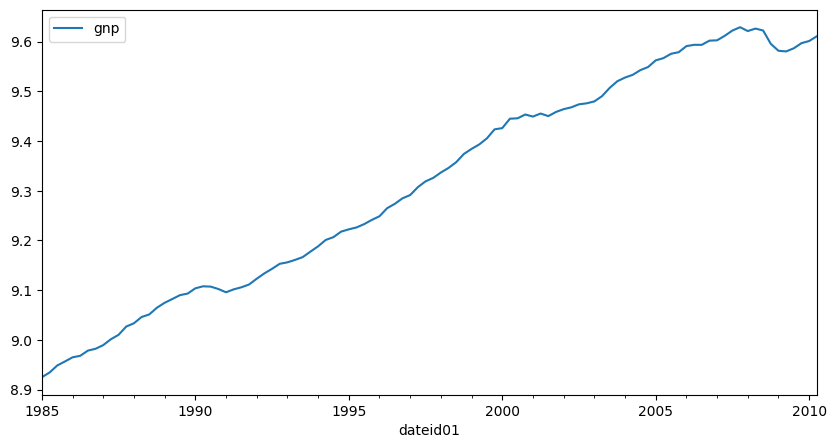

In [22]:
df_3.plot(x='dateid01', y='gnp', figsize=(10, 5));

In [23]:
modelo = sm.tsa.ARIMA(df_3["gnp"], order=(1, 0, 0), trend='t')  
modelo_fit = modelo.fit()
print(modelo_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    gnp   No. Observations:                  102
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 361.049
Date:                Thu, 03 Apr 2025   AIC                           -716.097
Time:                        21:39:36   BIC                           -708.222
Sample:                             0   HQIC                          -712.908
                                - 102                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0068      0.001      8.096      0.000       0.005       0.008
ar.L1          1.0000   1.99e-05   5.03e+04      0.000       1.000       1.000
sigma2      4.277e-05   3.71e-06     11.522      0.0

In [ ]:
# Crear la variable de tendencia
df_3['trend'] = range(1, len(df_3) + 1)

# Definir variables dependiente e independiente
X = sm.add_constant(df_3['trend'])  # agrega constante como @const
y = df_3['gnp']

# Ajustar modelo OLS
modelo = sm.OLS(y, X).fit()

# Resultados
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                    gnp   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     6206.
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           8.25e-92
Time:                        21:41:13   Log-Likelihood:                 221.01
No. Observations:                 102   AIC:                            -438.0
Df Residuals:                     100   BIC:                            -432.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9329      0.006   1599.672      0.0

In [25]:
df_3_3 = df_3.iloc[:92,:].reset_index(drop=True)
df_3_3.shape

(92, 10)

In [27]:
# Crear la variable de tendencia
df_3_3['trend'] = range(1, len(df_3_3) + 1)

# Definir variables dependiente e independiente
X = sm.add_constant(df_3_3['trend'])  # agrega constante como @const
y = df_3_3['gnp']

# Ajustar modelo OLS
modelo = sm.OLS(y, X).fit()

# Resultados
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    gnp   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.509e+04
Date:                Thu, 03 Apr 2025   Prob (F-statistic):          5.14e-102
Time:                        21:43:10   Log-Likelihood:                 249.31
No. Observations:                  92   AIC:                            -494.6
Df Residuals:                      90   BIC:                            -489.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9185      0.003   2606.029      0.0